In [25]:
'''Task1 
Write a function percentile(data, p) and test it with a list of 20 random values.
Explanation: Sort the data, compute the exact percentile position, and return the interpolated value.'''
import random

def percentile(data, p):
  
    # Step 1: Sort the data
    sorted_data = sorted(data)
    
    # Step 2: Find the position
    n = len(sorted_data)
    pos = (p / 100) * (n - 1)
    
    # Step 3: Split into integer and fractional part
    k = int(pos)           # Lower index
    d = pos - k            # Fractional part
    
    # Step 4: Interpolate if needed
    if k + 1 < n:
        percentile_value = sorted_data[k] + d * (sorted_data[k + 1] - sorted_data[k])
    else:
        percentile_value = sorted_data[k] 
    
    return percentile_value

# Test with 20 random values between 1 and 100
data = [random.randint(1, 100) for _ in range(20)]
print("Data:", data)

# Calculate some percentiles
print("25th percentile:", percentile(data, 25))
print("50th percentile (median):", percentile(data, 50))
print("75th percentile:", percentile(data, 75))
print("90th percentile:", percentile(data, 90))


Data: [98, 20, 55, 68, 55, 70, 96, 29, 94, 19, 75, 6, 64, 75, 97, 23, 79, 87, 100, 89]
25th percentile: 48.5
50th percentile (median): 72.5
75th percentile: 90.25
90th percentile: 97.1


In [26]:
'''Task2:
Write a function mid_range(data).
Explanation: Mid-range = (minimum value + maximum value) / 2.
Use this to show how sensitive mid-range is to extreme values.'''

import random

def mid_range(data):

    # Step 1: Find minimum value
    min_val = min(data)
    
    # Step 2: Find maximum value
    max_val = max(data)
    
    # Step 3: Compute mid-range
    mid = (min_val + max_val) / 2
    
    return mid

# Test with 10 random values between 1 and 50
data = [random.randint(1, 50) for _ in range(10)]
print("Data:", data)

# Calculate mid-range
print("Mid-range:", mid_range(data))

# Add an extreme value to show sensitivity
data_with_outlier = data + [1000]  # extreme high value
print("Data with extreme value:", data_with_outlier)
print("Mid-range with extreme value:", mid_range(data_with_outlier))


Data: [12, 35, 17, 27, 33, 14, 12, 12, 22, 6]
Mid-range: 20.5
Data with extreme value: [12, 35, 17, 27, 33, 14, 12, 12, 22, 6, 1000]
Mid-range with extreme value: 503.0


In [27]:
'''Task3:Write a function semi_interquartile_range(data).
Explanation: SIQR = (Q3 − Q1) / 2.
Use your percentile function to compute Q1 and Q3.'''

import random

# Reusing the percentile function
def percentile(data, p):
    sorted_data = sorted(data)
    n = len(sorted_data)
    pos = (p / 100) * (n - 1)
    k = int(pos)
    d = pos - k
    if k + 1 < n:
        return sorted_data[k] + d * (sorted_data[k + 1] - sorted_data[k])
    else:
        return sorted_data[k]

# Function to calculate Semi-Interquartile Range
def semi_interquartile_range(data):
    '''
    Calculate the Semi-Interquartile Range (SIQR) of a dataset.
    
    SIQR = (Q3 - Q1) / 2
    '''
    # Step 1: Compute Q1 (25th percentile)
    Q1 = percentile(data, 25)
    
    # Step 2: Compute Q3 (75th percentile)
    Q3 = percentile(data, 75)
    
    # Step 3: Compute SIQR
    SIQR = (Q3 - Q1) / 2
    
    return SIQR

# Test with 15 random values between 1 and 100
data = [random.randint(1, 100) for _ in range(15)]
print("Data:", data)

# Compute Q1, Q3, and SIQR
print("25th percentile (Q1):", percentile(data, 25))
print("75th percentile (Q3):", percentile(data, 75))
print("Semi-Interquartile Range (SIQR):", semi_interquartile_range(data))


Data: [58, 93, 36, 10, 67, 69, 22, 39, 7, 28, 44, 32, 94, 30, 62]
25th percentile (Q1): 29.0
75th percentile (Q3): 64.5
Semi-Interquartile Range (SIQR): 17.75


In [28]:
'''Task4:
Write a function mean_absolute_deviation(data).
Explanation: MAD = average of absolute differences from the mean.
Do not use any library for calculation.'''
#Mean Absolute Deviation (MAD) measures the average distance of data points from the mean.

# Function to calculate Mean Absolute Deviation (MAD)
def mean_absolute_deviation(data):
    n = len(data)              
    
    # Step 2: Compute mean
    mean = sum(data) / n
    
    # Step 3: Compute absolute differences from mean
    total_diff = 0
    for x in data:
        total_diff += abs(x - mean)
    
    # Step 4: Compute MAD
    mad = total_diff / n
    return mad

# Test with some numbers
data = [10, 20, 30, 40, 50]
print("Data:", data)
print("Mean Absolute Deviation (MAD):", mean_absolute_deviation(data))

Data: [10, 20, 30, 40, 50]
Mean Absolute Deviation (MAD): 12.0


In [29]:
'''Task5:
Write a function compare_dispersion(data1, data2).
Explanation: For both datasets compute std deviation and IQR.
Print which dataset is more dispersed based on these two measures.'''
# Percentile function (from earlier)
def percentile(data, p):
    data = sorted(data)
    n = len(data)
    pos = (p / 100) * (n - 1)
    k = int(pos)
    d = pos - k
    if k + 1 < n:
        return data[k] + d * (data[k + 1] - data[k])
    else:
        return data[k]

# Function to calculate standard deviation
def standard_deviation(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    return variance ** 0.5

# Function to calculate IQR
def interquartile_range(data):
    Q1 = percentile(data, 25)
    Q3 = percentile(data, 75)
    return Q3 - Q1

# Function to compare dispersion of two datasets
def compare_dispersion(data1, data2):
    # Compute SD and IQR for both datasets
    sd1 = standard_deviation(data1)
    sd2 = standard_deviation(data2)
    
    iqr1 = interquartile_range(data1)
    iqr2 = interquartile_range(data2)
    
    print("Dataset 1 -> SD:", sd1, ", IQR:", iqr1)
    print("Dataset 2 -> SD:", sd2, ", IQR:", iqr2)
    
    # Compare SD
    if sd1 > sd2:
        print("Based on Standard Deviation: Dataset 1 is more dispersed")
    elif sd1 < sd2:
        print("Based on Standard Deviation: Dataset 2 is more dispersed")
    else:
        print("Based on Standard Deviation: Both datasets have same dispersion")
    
    # Compare IQR
    if iqr1 > iqr2:
        print("Based on IQR: Dataset 1 is more dispersed")
    elif iqr1 < iqr2:
        print("Based on IQR: Dataset 2 is more dispersed")
    else:
        print("Based on IQR: Both datasets have same dispersion")

# Test the function
data1 = [10, 20, 30, 40, 50]
data2 = [5, 15, 25, 35, 100]  # has an extreme value

compare_dispersion(data1, data2)


Dataset 1 -> SD: 14.142135623730951 , IQR: 20.0
Dataset 2 -> SD: 33.52610922848042 , IQR: 20.0
Based on Standard Deviation: Dataset 2 is more dispersed
Based on IQR: Both datasets have same dispersion


In [30]:
'''Task6 
Write a function rolling_std(data, window).
Explanation:
For a given window size (like 3), compute standard deviation for each rolling segment.
Example:
data = [10, 12, 14, 20, 22] → rolling window = 3
compute std for [10,12,14], [12,14,20], [14,20,22].'''

# Function to compute standard deviation
def standard_deviation(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    return variance ** 0.5

# Function to compute rolling standard deviation
def rolling_std(data, window):
    rolling_sds = []
    for i in range(len(data) - window + 1):
        segment = data[i:i+window]
        sd = standard_deviation(segment)
        rolling_sds.append(sd)
    return rolling_sds

# Test the function
data = [10, 12, 14, 20, 22]
window = 3
print("Rolling SD:", rolling_std(data, window))


Rolling SD: [1.632993161855452, 3.39934634239519, 3.39934634239519]


In [37]:
'''Task7
Write a function detect_high_variability_days(data, threshold).
Explanation:
If the std deviation of any 5-day window exceeds the threshold, mark those days as "high variability".'''

def detect_high_variability_days(data, threshold):
    high_days = set()  # store high variability days without duplicates
    window = 5

    for i in range(len(data) - window + 1):
        segment = data[i:i+window]
        mean = sum(segment) / window
        sd = (sum((x - mean) ** 2 for x in segment) / window) ** 0.5  # standard deviation
        if sd > threshold:
            high_days.update(range(i, i+window))  # add all days in this window

    return sorted(high_days)


import random

data = [random.randint(50, 150) for _ in range(15)]
threshold = 10

print("Data:", data)
print("High variability days:", detect_high_variability_days(data, threshold))


Data: [84, 120, 91, 52, 143, 51, 107, 99, 90, 75, 94, 77, 137, 135, 103]
High variability days: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


Mean: 52.36
Standard Deviation: 26.937527726203832
IQR: 39.0


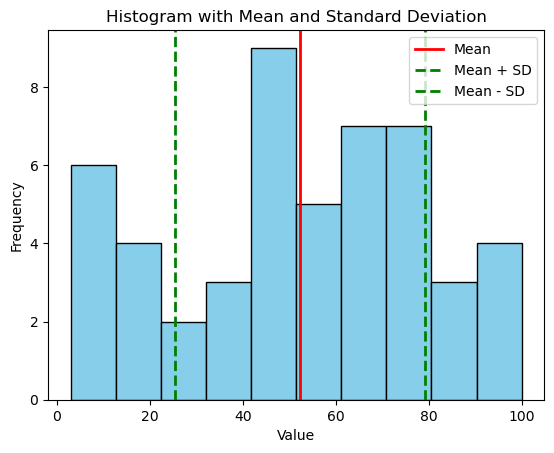

In [32]:
'''Task 8:
Load or create a dataset of 50 numbers and plot its distribution using a histogram.
Explanation:
Before plotting, compute mean, std deviation, and IQR.
On the plot, draw vertical lines for:
mean
mean + std deviation
mean – std deviation
to show dispersion visually.'''
import random
import matplotlib.pyplot as plt

# 1. Create dataset of 50 random numbers (1 to 100)
data = [random.randint(1, 100) for _ in range(50)]

# 2. Compute Mean
mean = sum(data) / len(data)

# 3. Compute Standard Deviation
std_dev = (sum((x - mean) ** 2 for x in data) / len(data)) ** 0.5

# 4. Compute IQR
def percentile(data, p):
    data = sorted(data)
    n = len(data)
    pos = (p/100) * (n-1)
    k = int(pos)
    d = pos - k
    if k + 1 < n:
        return data[k] + d * (data[k+1] - data[k])
    else:
        return data[k]

Q1 = percentile(data, 25)
Q3 = percentile(data, 75)
IQR = Q3 - Q1

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("IQR:", IQR)

# 5. Plot Histogram
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# Draw vertical lines for mean, mean + SD, mean - SD
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label='Mean')
plt.axvline(mean + std_dev, color='green', linestyle='--', linewidth=2, label='Mean + SD')
plt.axvline(mean - std_dev, color='green', linestyle='--', linewidth=2, label='Mean - SD')

plt.title("Histogram with Mean and Standard Deviation")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Dataset A: [51, 55, 51, 54, 53, 47, 47, 51, 55, 52, 53, 47, 55, 54, 48, 54, 49, 49, 49, 52]
Q1: 49 Q3: 54 SD: 2.758622844826744 CV: 0.05377432446056032
Dataset B: [56, 46, 70, 46, 42, 46, 49, 64, 57, 61, 40, 51, 32, 48, 34, 38, 43, 66, 42, 45]
Q1: 42 Q3: 56 SD: 10.269371937952194 CV: 0.2104379495482007


C:\Users\shres\AppData\Local\Temp\ipykernel_6652\2106183402.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dataset_A, dataset_B], labels=['Dataset A','Dataset B'])


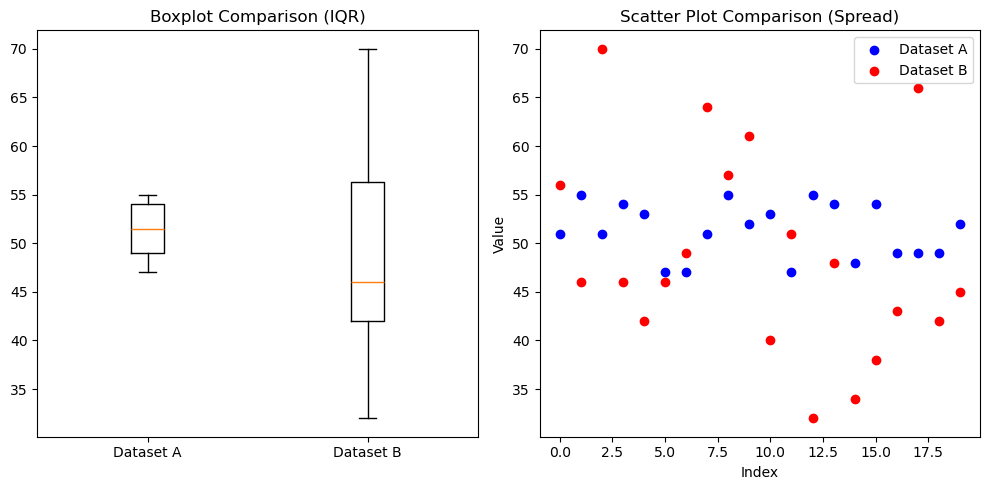

In [33]:
''''task 9
Generate two datasets (Dataset A with low spread and Dataset B with high spread).
Plot both on the same figure using:
boxplot
scatter plot
Explanation:
First compute Q1, Q3, std deviation, and coefficient of variation.
Then plot the boxplot to show IQR difference
and scatter plot to show spread difference.
'''
import random
import matplotlib.pyplot as plt

# 1. Generate datasets
dataset_A = [random.randint(45, 55) for _ in range(20)]  # low spread
dataset_B = [random.randint(30, 70) for _ in range(20)]  # high spread

# 2. Function to compute statistics
def stats(data):
    n = len(data)
    sorted_data = sorted(data)
    Q1 = sorted_data[int(0.25*(n-1))]
    Q3 = sorted_data[int(0.75*(n-1))]
    mean = sum(data)/n
    std_dev = (sum((x - mean)**2 for x in data)/n)**0.5
    CV = std_dev / mean
    return Q1, Q3, std_dev, CV, mean

# Compute stats for both datasets
Q1_A, Q3_A, SD_A, CV_A, mean_A = stats(dataset_A)
Q1_B, Q3_B, SD_B, CV_B, mean_B = stats(dataset_B)

print("Dataset A:", dataset_A)
print("Q1:", Q1_A, "Q3:", Q3_A, "SD:", SD_A, "CV:", CV_A)
print("Dataset B:", dataset_B)
print("Q1:", Q1_B, "Q3:", Q3_B, "SD:", SD_B, "CV:", CV_B)

# 3. Boxplot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot([dataset_A, dataset_B], labels=['Dataset A','Dataset B'])
plt.title("Boxplot Comparison (IQR)")

# 4. Scatter plot
plt.subplot(1,2,2)
plt.scatter(range(len(dataset_A)), dataset_A, color='blue', label='Dataset A')
plt.scatter(range(len(dataset_B)), dataset_B, color='red', label='Dataset B')
plt.title("Scatter Plot Comparison (Spread)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()


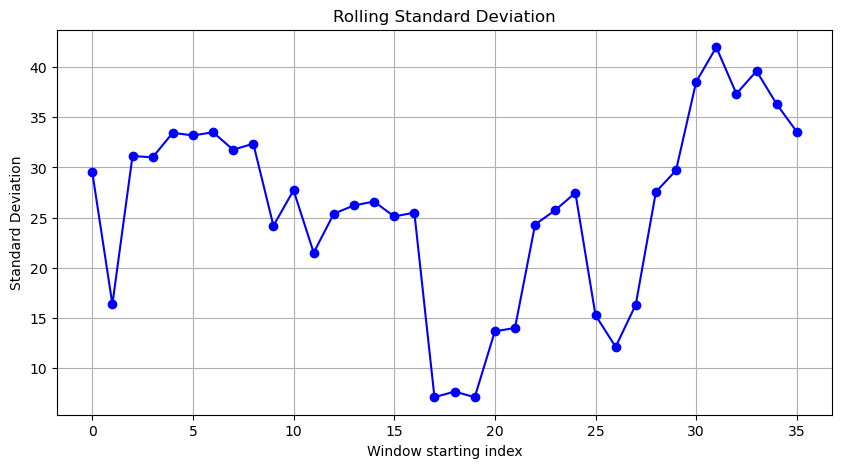

In [34]:
'''Task 10
Create a line plot of rolling standard deviation for a dataset of 40 values.
Explanation:
Use your rolling_std() function.
Plot how the std deviation changes over time.
This shows how dispersion varies across segments of data.'''

import random
import matplotlib.pyplot as plt

# Function to compute standard deviation
def standard_deviation(data):
    mean = sum(data) / len(data)
    return (sum((x - mean)**2 for x in data) / len(data))**0.5

# Function to compute rolling standard deviation
def rolling_std(data, window):
    rolling_sds = []
    for i in range(len(data) - window + 1):
        segment = data[i:i+window]
        rolling_sds.append(standard_deviation(segment))
    return rolling_sds

# 1. Create dataset of 40 random values (1 to 100)
data = [random.randint(1, 100) for _ in range(40)]

# 2. Compute rolling standard deviation with window size 5
window = 5
rolling_sds = rolling_std(data, window)

# 3. Plot rolling standard deviation
plt.figure(figsize=(10,5))
plt.plot(range(len(rolling_sds)), rolling_sds, marker='o', color='blue')
plt.title("Rolling Standard Deviation")
plt.xlabel("Window starting index")
plt.ylabel("Standard Deviation")
plt.grid(True)
plt.show()